In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as stats 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import MultinomialNB, GaussianNB




# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)

/Users/urvi/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/urvi/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df1 = pd.read_csv("student-mat.csv", sep=',')
df1.head()

,Id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,gradesAffected
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,6,5,6,6,1
1,2,GP,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,4,5,5,6,1
2,3,GP,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,10,7,8,10,0
3,4,GP,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,2,15,14,15,0
4,5,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,4,6,10,10,0


Performing EDA >>

In [4]:
df1.tail()

,Id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,gradesAffected
390,391,MS,M,20,U,LE3,A,2,2,services,...,5,4,4,5,4,11,9,9,9,1
391,392,MS,M,17,U,LE3,T,3,1,services,...,4,5,3,4,2,3,14,16,16,0
392,393,MS,M,21,R,GT3,T,1,1,other,...,5,3,3,3,3,3,10,8,7,1
393,394,MS,M,18,R,LE3,T,3,2,services,...,4,1,3,4,5,0,11,12,10,0
394,395,MS,M,19,U,LE3,T,1,1,other,...,2,3,3,3,5,5,8,9,9,1


In [5]:
df1.describe()

,Id,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,gradesAffected
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,198.000000,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,0.329114
std,114.170924,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,0.470487
min,1.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,99.500000,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,0.000000
50%,198.000000,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,0.000000
75%,296.500000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,1.000000
max,395.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,1.000000


In [6]:
df1.sample()

,Id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,gradesAffected
286,287,GP,F,18,U,GT3,T,2,2,at_home,...,3,3,1,2,2,5,18,18,19,0


In [7]:
df2 = pd.read_csv("student-por.csv", sep=',')
df2.head()

,Id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,gradesAffected
0,396,GP,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,4,0,11,11,0
1,397,GP,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,2,9,11,11,0
2,398,GP,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,6,12,13,12,0
3,399,GP,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,0,14,14,14,0
4,400,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,0,11,13,13,0


In [8]:
df2.tail()

,Id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,gradesAffected
644,1040,MS,F,19,R,GT3,T,2,3,services,...,4,2,1,2,5,4,10,11,10,0
645,1041,MS,F,18,U,LE3,T,3,1,teacher,...,3,4,1,1,1,4,15,15,16,0
646,1042,MS,F,18,U,GT3,T,1,1,other,...,1,1,1,1,5,6,11,12,9,1
647,1043,MS,M,17,U,LE3,T,3,1,services,...,4,5,3,4,2,6,10,10,10,0
648,1044,MS,M,18,R,LE3,T,3,2,services,...,4,1,3,4,5,4,10,11,11,0


In [9]:
df2.describe()

,Id,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,gradesAffected
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,720.000000,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009,0.154083
std,187.494444,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656,0.361307
min,396.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,558.000000,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,0.000000
50%,720.000000,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,0.000000
75%,882.000000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,0.000000
max,1044.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,1.000000


Merging the two Datasets into One>>>

In [10]:
df = [df1,df2]
df=pd.concat(df)

In [11]:
df.count()

Id                1044
school            1044
sex               1044
age               1044
address           1044
famsize           1044
Pstatus           1044
Medu              1044
Fedu              1044
Mjob              1044
Fjob              1044
reason            1044
guardian          1044
traveltime        1044
studytime         1044
failures          1044
schoolsup         1044
famsup            1044
paid              1044
activities        1044
nursery           1044
higher            1044
internet          1044
romantic          1044
famrel            1044
freetime          1044
goout             1044
Dalc              1044
Walc              1044
health            1044
absences          1044
G1                1044
G2                1044
G3                1044
gradesAffected    1044
dtype: int64

In [12]:
df.describe()

,Id,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,gradesAffected
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,522.500000,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954,0.220307
std,301.521144,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796,0.414652
min,1.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,261.750000,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000,0.000000
50%,522.500000,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000,0.000000
75%,783.250000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,0.000000
max,1044.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,1.000000


In [13]:
df.head()

,Id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,gradesAffected
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,6,5,6,6,1
1,2,GP,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,4,5,5,6,1
2,3,GP,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,10,7,8,10,0
3,4,GP,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,2,15,14,15,0
4,5,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,4,6,10,10,0


In [14]:
df.tail()

,Id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,gradesAffected
644,1040,MS,F,19,R,GT3,T,2,3,services,...,4,2,1,2,5,4,10,11,10,0
645,1041,MS,F,18,U,LE3,T,3,1,teacher,...,3,4,1,1,1,4,15,15,16,0
646,1042,MS,F,18,U,GT3,T,1,1,other,...,1,1,1,1,5,6,11,12,9,1
647,1043,MS,M,17,U,LE3,T,3,1,services,...,4,5,3,4,2,6,10,10,10,0
648,1044,MS,M,18,R,LE3,T,3,2,services,...,4,1,3,4,5,4,10,11,11,0


Finding Missing Values if any>>>

In [15]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Id                0
school            0
sex               0
age               0
address           0
famsize           0
Pstatus           0
Medu              0
Fedu              0
Mjob              0
Fjob              0
reason            0
guardian          0
traveltime        0
studytime         0
failures          0
schoolsup         0
famsup            0
paid              0
activities        0
nursery           0
higher            0
internet          0
romantic          0
famrel            0
freetime          0
goout             0
Dalc              0
Walc              0
health            0
absences          0
G1                0
G2                0
G3                0
gradesAffected    0
dtype: int64

There were no null values in the dataset

In [16]:
df.apply(lambda x: sum(x==0),axis=0)

Id                  0
school              0
sex                 0
age                 0
address             0
famsize             0
Pstatus             0
Medu                9
Fedu                9
Mjob                0
Fjob                0
reason              0
guardian            0
traveltime          0
studytime           0
failures          861
schoolsup           0
famsup              0
paid                0
activities          0
nursery             0
higher              0
internet            0
romantic            0
famrel              0
freetime            0
goout               0
Dalc                0
Walc                0
health              0
absences          359
G1                  1
G2                 20
G3                 53
gradesAffected    814
dtype: int64

Although there are values with Value 0 in the dataset

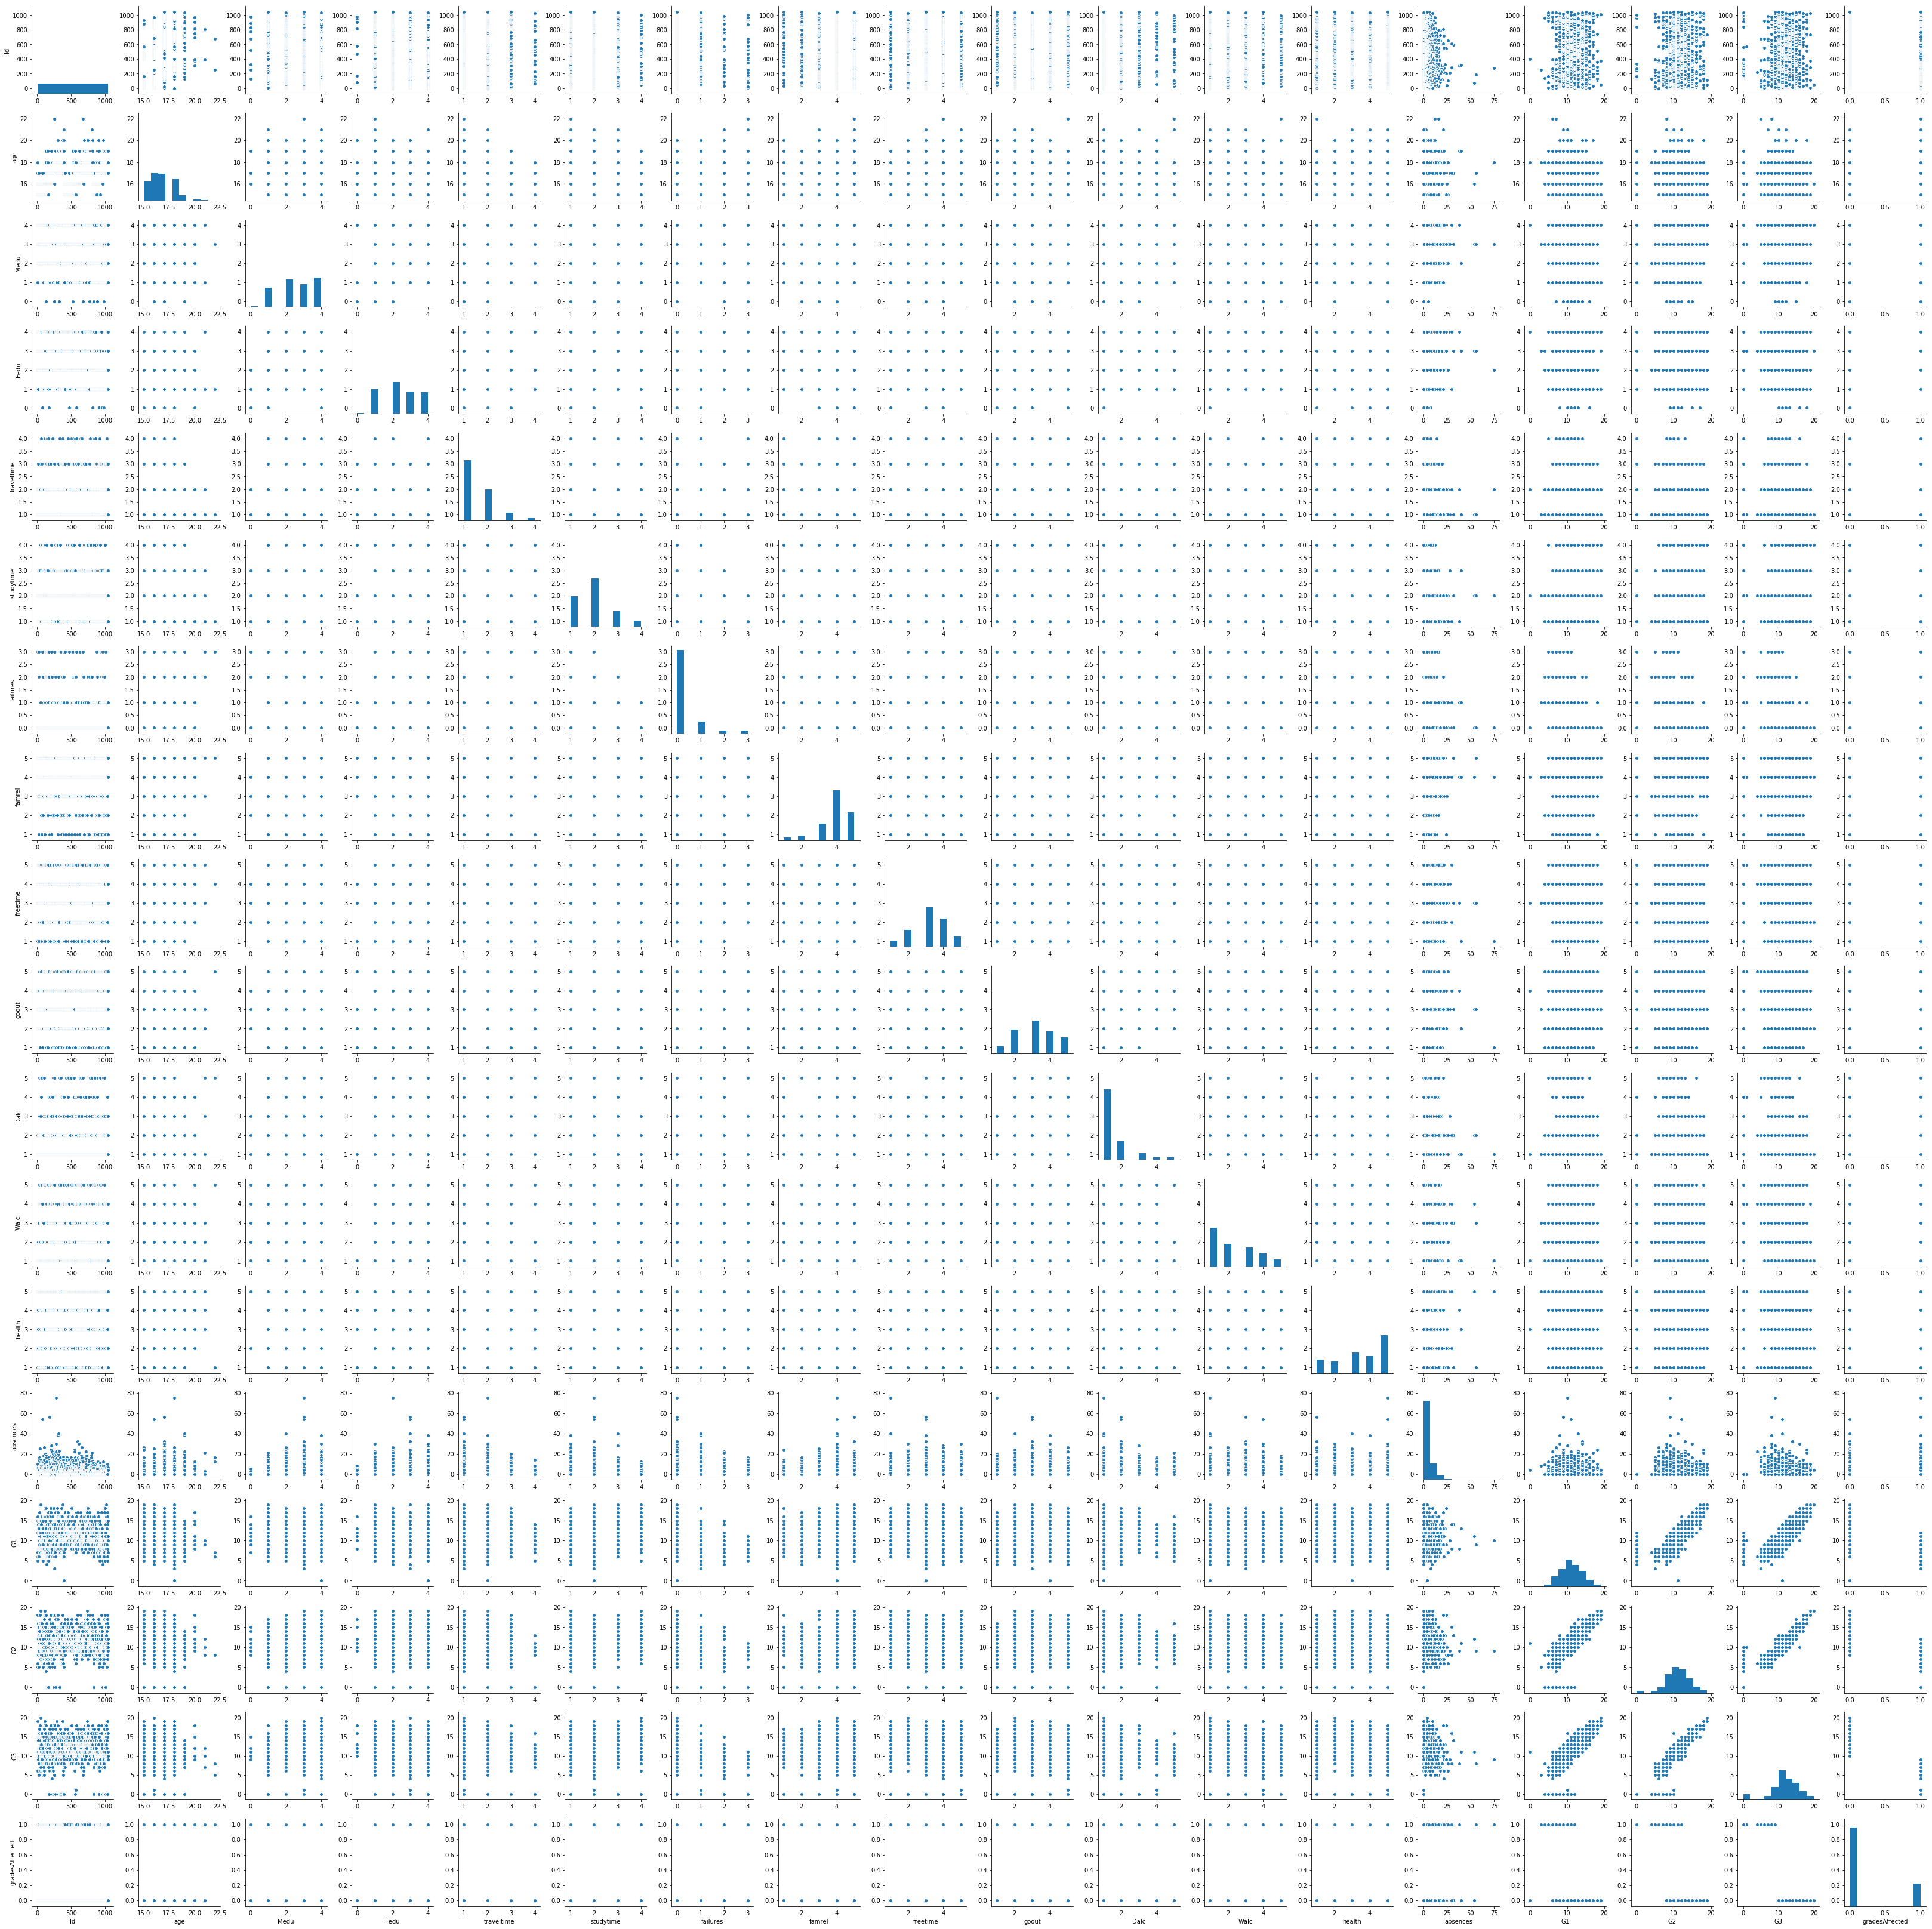

In [17]:
sns.pairplot(df)

In [18]:
corr_check = df.corr()
corr_check

,Id,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,gradesAffected
Id,1.000000,0.303691,-0.199170,-0.177819,0.171551,-0.078076,-0.026698,-0.017645,-0.024966,0.068449,0.044004,0.028318,-0.043003,-0.149098,-0.006064,0.040102,0.083156,-0.080957
age,0.303691,1.000000,-0.130196,-0.138521,0.049216,-0.007870,0.282364,0.007162,0.002645,0.118510,0.133453,0.098291,-0.029129,0.153196,-0.124121,-0.119475,-0.125282,0.134276
Medu,-0.199170,-0.130196,1.000000,0.642063,-0.238181,0.090616,-0.187769,0.015004,0.001054,0.025614,0.001515,-0.029331,-0.013254,0.059708,0.226101,0.224662,0.201472,-0.106460
Fedu,-0.177819,-0.138521,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.013066,0.002142,0.030075,-0.000165,0.019524,0.034288,0.040829,0.195898,0.182634,0.159796,-0.105579
traveltime,0.171551,0.049216,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.012578,-0.007403,0.049740,0.109423,0.084292,-0.029002,-0.022669,-0.121053,-0.140163,-0.102627,0.033852
studytime,-0.078076,-0.007870,0.090616,0.033458,-0.081328,1.000000,-0.152024,0.012324,-0.094429,-0.072941,-0.159665,-0.229073,-0.063044,-0.075594,0.211314,0.183167,0.161629,-0.108553
failures,-0.026698,0.282364,-0.187769,-0.191390,0.087177,-0.152024,1.000000,-0.053676,0.102679,0.074683,0.116336,0.107432,0.048311,0.099998,-0.374175,-0.377172,-0.383145,0.367183
famrel,-0.017645,0.007162,0.015004,0.013066,-0.012578,0.012324,-0.053676,1.000000,0.136901,0.080619,-0.076483,-0.100663,0.104101,-0.062171,0.036947,0.042054,0.054461,-0.042706
freetime,-0.024966,0.002645,0.001054,0.002142,-0.007403,-0.094429,0.102679,0.136901,1.000000,0.323556,0.144979,0.130377,0.081517,-0.032079,-0.051985,-0.068952,-0.064890,0.064414
goout,0.068449,0.118510,0.025614,0.030075,0.049740,-0.072941,0.074683,0.080619,0.323556,1.000000,0.253135,0.399794,-0.013736,0.056142,-0.101163,-0.108411,-0.097877,0.106506


We will choose to predict factors that will affect the Final Grades only!!!

For Predicting the Factors affecting Final Grades, We will find out the columns that are more positively correlated.
We found out that, Study_time , Mothers Education and fathers education are the most responsible for a students Grade.

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y, X = dmatrices('gradesAffected ~ studytime + +Medu + Fedu', df, return_type='dataframe')
vif = pd.DataFrame() 
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,11.964428,Intercept
1,1.009338,studytime
2,1.715354,Medu
3,1.703175,Fedu


If the VIF factor of a predictor variable are these, it means that the standard error for the coefficient of that predictor variable is not as large as it would be if that predictor variable were uncorrelated with the other predictor variables.(We check by taking the Square root of the value obtained)

OUTLIERS>>>

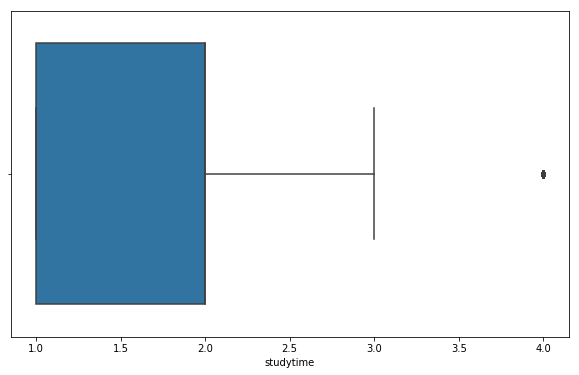

In [20]:
sns.boxplot(df['studytime'])

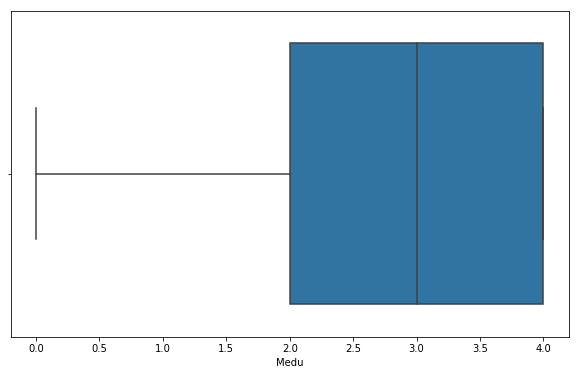

In [21]:
sns.boxplot(df['Medu'])

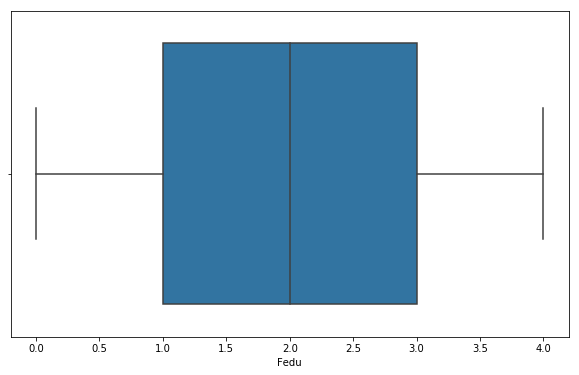

In [22]:
sns.boxplot(df['Fedu'])

Outliers were not detected. 

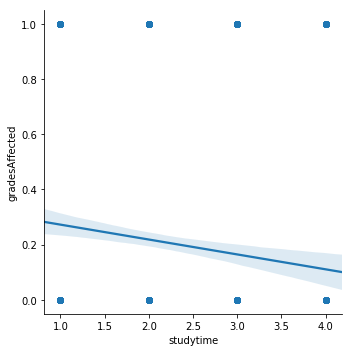

In [23]:
sns.lmplot(y="gradesAffected", x="studytime", data=df)
plt.show()

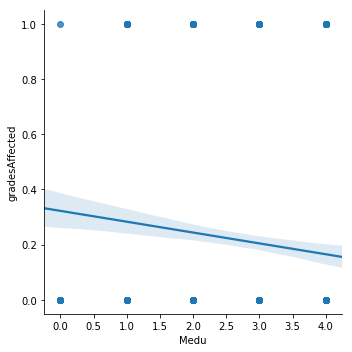

In [24]:
sns.lmplot(y="gradesAffected", x="Medu", data=df)
plt.show()

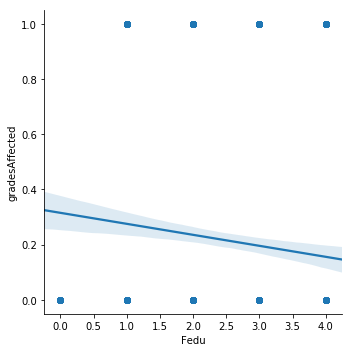

In [25]:
sns.lmplot(y="gradesAffected", x="Fedu", data=df)
plt.show()

In [26]:
X = df[["studytime","Medu", "Fedu"]]
y = df[["gradesAffected"]]

Using LOGISTIC REGRESSION MODEL

In [27]:
df['intercept'] = 1.0
df.head()

,Id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,gradesAffected,intercept
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,4,1,1,3,6,5,6,6,1,1.0
1,2,GP,F,17,U,GT3,T,1,1,at_home,...,3,1,1,3,4,5,5,6,1,1.0
2,3,GP,F,15,U,LE3,T,1,1,at_home,...,2,2,3,3,10,7,8,10,0,1.0
3,4,GP,F,15,U,GT3,T,4,2,health,...,2,1,1,5,2,15,14,15,0,1.0
4,5,GP,F,16,U,GT3,T,3,3,other,...,2,1,2,5,4,6,10,10,0,1.0


In [28]:
pred=['studytime','Medu','Fedu','intercept']
pred

['studytime', 'Medu', 'Fedu', 'intercept']

In [29]:
df_model = sm.Logit(df['gradesAffected'], df[pred]).fit()
#hours_pass_model=logreg.fit(hours_pass['Hours'], hours_pass['Pass'])
#hours_pass_model.coef_

Optimization terminated successfully.
         Current function value: 0.515127
         Iterations 6


The default alpha = 0.05 returns a 95% confidence interval.

In [30]:
df_model.conf_int()

,0,1
studytime,-0.501236,-0.123173
Medu,-0.286524,0.055520
Fedu,-0.328770,0.025960
intercept,-0.526276,0.471197


In [31]:
df_model.conf_int(alpha=0.01)

,0,1
studytime,-0.560634,-0.063775
Medu,-0.340263,0.109260
Fedu,-0.384502,0.081692
intercept,-0.682990,0.627911


In [32]:
np.exp(df_model.params)

studytime    0.731832
Medu         0.890919
Fedu         0.859500
intercept    0.972836
dtype: float64

In [33]:
# odds ratios and 95% CI
params = df_model.params
conf = df_model.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OddsRatio']
np.exp(conf)

,2.5%,97.5%,OddsRatio
studytime,0.605781,0.884111,0.731832
Medu,0.750869,1.057091,0.890919
Fedu,0.719809,1.026300,0.859500
intercept,0.590801,1.601910,0.972836


In [34]:
# setting Logistic regression classifier
# scikit-learn includes the intercept.

lr = LogisticRegression(C=1e9)

#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state=0)

# Logistic regression metrics
LRm = lr.fit(X_train, y_train)

LRm.predict_proba(X_test)  # The returned estimates for all classes are ordered by the label of classes.

/Users/urvi/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 0.73437111,  0.26562889],
       [ 0.79894789,  0.20105211],
       [ 0.7086509 ,  0.2913491 ],
       [ 0.87080742,  0.12919258],
       [ 0.75095666,  0.24904334],
       [ 0.82593934,  0.17406066],
       [ 0.83291512,  0.16708488],
       [ 0.79285761,  0.20714239],
       [ 0.83291512,  0.16708488],
       [ 0.65974153,  0.34025847],
       [ 0.7086509 ,  0.2913491 ],
       [ 0.84309228,  0.15690772],
       [ 0.80675231,  0.19324769],
       [ 0.86653028,  0.13346972],
       [ 0.84309228,  0.15690772],
       [ 0.83291512,  0.16708488],
       [ 0.67072258,  0.32927742],
       [ 0.71633118,  0.28366882],
       [ 0.77758676,  0.22241324],
       [ 0.67072258,  0.32927742],
       [ 0.83291512,  0.16708488],
       [ 0.84309228,  0.15690772],
       [ 0.8894861 ,  0.1105139 ],
       [ 0.69836589,  0.30163411],
       [ 0.75316031,  0.24683969],
       [ 0.71633118,  0.28366882],
       [ 0.80675231,  0.19324769],
       [ 0.7761922 ,  0.2238078 ],
       [ 0.71633118,

In [35]:
LRm.coef_

array([[-0.26419257, -0.17738584, -0.04931237]])

In [36]:
LRm.intercept_

array([-0.17125182])

In [37]:
LRm.decision_function(X_test) # Predict confidence scores for samples.

array([-1.01691429, -1.3797316 , -0.88884081, -1.90811673, -1.10372102,
       -1.55711744, -1.60642981, -1.34223724, -1.60642981, -0.6621426 ,
       -0.88884081, -1.68141852, -1.42904396, -1.87062238, -1.68141852,
       -1.60642981, -0.71145497, -0.92633517, -1.25165812, -0.71145497,
       -1.60642981, -1.68141852, -2.08550258, -0.83952845, -1.11553903,
       -0.92633517, -1.42904396, -1.2436125 , -0.92633517, -1.3797316 ,
       -0.83952845, -1.3797316 , -0.88884081, -1.11553903, -1.64392416,
       -0.92633517, -0.6621426 , -1.15303338, -1.06622666, -1.20234575,
       -0.83952845, -1.87062238, -0.97564754, -1.33041923, -0.71145497,
       -1.34223724, -1.34223724, -1.15303338, -1.41722595, -1.29292487,
       -1.82131001, -0.71145497, -0.97564754, -1.28110686, -0.93815318,
       -0.92633517, -1.41722595, -1.34223724, -1.3797316 , -1.60642981,
       -1.33041923, -1.29292487, -1.55711744, -1.3797316 , -1.87062238,
       -1.10372102, -0.92633517, -1.82131001, -0.74894933, -0.92

In [38]:
LRm.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [39]:
y_pred = LRm.predict(X_test)
print("Accuracy score using Logistic regression is %s" %metrics.accuracy_score(y_test, y_pred))

Accuracy score using Logistic regression is 0.794258373206


Using RANDOM FOREST Model>>>


In [40]:
# Decision Tree classifier

DTm = DecisionTreeClassifier()
                                
# Decision Tree metrics
sm = DTm.fit(X_train, y_train)

y_pred = sm.predict(X_test)
print("Accuracy score using Decision Tree is %s" %metrics.accuracy_score(y_test, y_pred))

Accuracy score using Decision Tree is 0.784688995215


In [41]:
# Random Forest classifier
RFm = RandomForestClassifier(n_jobs=2)
                                
# Random Forest metrics
Rm = RFm.fit(X_train, y_train)

y_pred = Rm.predict(X_test)
print("Accuracy score using Random Forest is %s" %metrics.accuracy_score(y_test, y_pred))

/Users/urvi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy score using Random Forest is 0.784688995215


NAIVE BAYES>>>

In [42]:
df['studytime'].value_counts()

2    503
1    317
3    162
4     62
Name: studytime, dtype: int64

In [43]:
df['Medu'].value_counts()

4    306
2    289
3    238
1    202
0      9
Name: Medu, dtype: int64

In [44]:
df['Fedu'].value_counts()

2    324
1    256
3    231
4    224
0      9
Name: Fedu, dtype: int64

In [45]:
df['gradesAffected'].value_counts()

0    814
1    230
Name: gradesAffected, dtype: int64

Making a Bayesian Prediction

In [46]:
df[(df.studytime==2) & (df.Medu==4) & (df.Fedu==2)]

,Id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,gradesAffected,intercept
22,23,GP,M,16,U,LE3,T,4,2,teacher,...,1,1,3,5,2,15,15,16,0,1.0
48,49,GP,M,15,U,GT3,T,4,2,teacher,...,3,2,2,5,2,15,15,14,0,1.0
51,52,GP,F,15,U,LE3,T,4,2,health,...,3,1,1,5,2,11,13,13,0,1.0
59,60,GP,F,16,U,GT3,T,4,2,services,...,3,1,1,5,2,15,16,16,0,1.0
93,94,GP,F,16,U,GT3,T,4,2,teacher,...,3,1,1,1,0,11,10,10,0,1.0
167,168,GP,F,16,U,GT3,T,4,2,health,...,3,1,1,3,0,14,15,16,0,1.0
268,269,GP,M,18,U,GT3,T,4,2,health,...,5,1,3,5,10,10,9,10,0,1.0
290,291,GP,M,18,U,GT3,T,4,2,teacher,...,2,1,4,5,11,12,11,11,0,1.0
22,418,GP,M,16,U,LE3,T,4,2,teacher,...,1,1,3,5,0,12,13,14,0,1.0
48,444,GP,M,15,U,GT3,T,4,2,teacher,...,3,2,2,5,4,11,12,13,0,1.0


In [47]:
df[(df.studytime==2) & (df.Medu==4) & (df.Fedu==2)].gradesAffected.value_counts()

0    21
1     2
Name: gradesAffected, dtype: int64

Calculating the conditional Probablity of gradesAffected

In [48]:
((21/814)*(814/1044))/(230/1044)

0.09130434782608696

In [49]:
((2/230)*(814/1044))/(230/1044)

0.03077504725897921

Comparing Multinominal and Gaussian Naive Bayes>>>

In [50]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_class = mnb.predict(X_test)
print ("Accuracy score using Multinominal Naive Bayes is %s" %metrics.accuracy_score(y_test, y_pred_class))

Accuracy score using Multinominal Naive Bayes is 0.794258373206


/Users/urvi/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Over Sampling the Data


In [51]:
df_encoded = pd.get_dummies(df)

In [52]:
training_features, test_features, \
training_target, test_target, = train_test_split(df_encoded.drop(['gradesAffected'], axis=1),
                                               df_encoded['gradesAffected'],
                                               test_size = .1,
                                               random_state=12)

In [53]:
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size = .1,
                                                  random_state=12)

In [54]:
from imblearn.over_sampling import SMOTE

In [55]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

/Users/urvi/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [56]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [57]:
from sklearn.metrics import recall_score

In [58]:
print ('Validation Results')
print (clf_rf.score(x_val, y_val))
print (recall_score(y_val, clf_rf.predict(x_val)))
print ('\nTest Results')
print (clf_rf.score(test_features, test_target))
print (recall_score(test_target, clf_rf.predict(test_features)))

Validation Results
1.0
1.0

Test Results
1.0
1.0


In [59]:
d = pd.read_csv("final.csv", sep=',')
d.head()

,Id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,gradesAffected
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,6,5,6,6,1
1,2,GP,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,4,5,5,6,1
2,3,GP,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,10,7,8,10,0
3,4,GP,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,2,15,14,15,0
4,5,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,4,6,10,10,0


In [62]:
d.dtypes


Id                 int64
school            object
sex               object
age                int64
address           object
famsize           object
Pstatus           object
Medu               int64
Fedu               int64
Mjob              object
Fjob              object
reason            object
guardian          object
traveltime         int64
studytime          int64
failures           int64
schoolsup         object
famsup            object
paid              object
activities        object
nursery           object
higher            object
internet          object
romantic          object
famrel             int64
freetime           int64
goout              int64
Dalc               int64
Walc               int64
health             int64
absences           int64
G1                 int64
G2                 int64
G3                 int64
gradesAffected     int64
dtype: object

In [63]:
d.isnull().sum()

Id                0
school            0
sex               0
age               0
address           0
famsize           0
Pstatus           0
Medu              0
Fedu              0
Mjob              0
Fjob              0
reason            0
guardian          0
traveltime        0
studytime         0
failures          0
schoolsup         0
famsup            0
paid              0
activities        0
nursery           0
higher            0
internet          0
romantic          0
famrel            0
freetime          0
goout             0
Dalc              0
Walc              0
health            0
absences          0
G1                0
G2                0
G3                0
gradesAffected    0
dtype: int64